<a href="https://colab.research.google.com/github/jhonDataScience/Financiero/blob/main/Salario_Adultos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

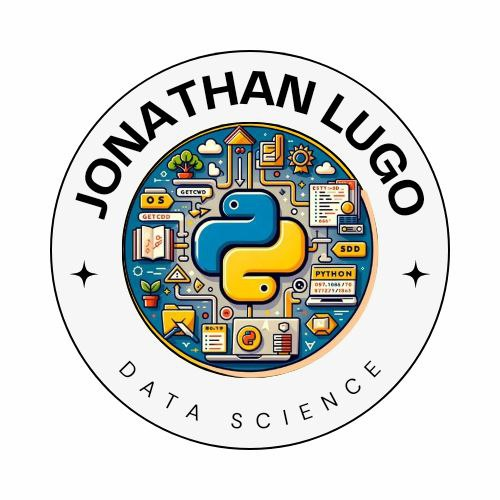

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import os
!ls "/content/drive/My Drive/Colab Notebooks"
# Check if the file exists
if os.path.exists('/content/drive/My Drive/Colab Notebooks/adult.csv'):
    print("File exists!")
else:
    print("File not found. Please check the file path and ensure the file is present in Google Drive.")

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/adult.csv'

df = pd.read_csv(file_path)

ls: cannot access '/content/drive/My Drive/Colab Notebooks': No such file or directory
File not found. Please check the file path and ensure the file is present in Google Drive.
Mounted at /content/drive


In [6]:
print('# Tamaño del Archivo')
# Use the correct file path
file_size = os.path.getsize('/content/drive/My Drive/Colab Notebooks/adult.csv')
print('adult.csv'.ljust(30) + str(round(file_size / 1000000, 2)) + 'MB')


# Tamaño del Archivo
adult.csv                     4.1MB


In [7]:
df.shape

(32561, 15)

In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df[df == '?'] = np.nan

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
X = df.drop(['income'], axis=1)

y = df['income']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

# Modelo de regresión logística con todas las características

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Puntuación de precisión de regresión logística con todas las funciones: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión de regresión logística con todas las funciones: 0.2415


**Regresión logística con PCA**

La clase PCA de Scikit-Learn implementa el algoritmo PCA utilizando el código que se muestra a continuación. Antes de profundizar, explicaré otro concepto importante llamado razón de varianza explicada.

**Razón de varianza explicada**

Un dato muy útil es la razón de varianza explicada de cada componente principal. Está disponible a través de la variable explained_variance_ratio_. Indica la proporción de la varianza del conjunto de datos que se encuentra a lo largo del eje de cada componente principal.


*Ahora, vayamos a la implementación de PCA.*

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

# Comentario
Podemos ver que aproximadamente el 97,25 % de la varianza se explica por las primeras 13 variables.

Solo el 2,75 % de la varianza se explica por la última variable. Por lo tanto, podemos suponer que contiene poca información.

Por lo tanto, lo dejaré, entrenaré el modelo nuevamente y calcularé la precisión.

# Regresión logística con las primeras 13 características

In [28]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Puntuación de precisión de regresión logística con las primeras 13 características: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión de regresión logística con las primeras 13 características: 0.8213


**Comentario**

Podemos ver que la precisión se ha reducido de 0,8218 a 0,8213 después de descartar la última característica.

Ahora, si tomo las dos últimas características combinadas, podemos ver que aproximadamente el 7 % de la varianza se explica por ellas.

Las descartaré, entrenaré el modelo nuevamente y calcularé la precisión.

# Regresión logística con las primeras 12 características

In [29]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Puntuación de precisión de regresión logística con las primeras 12 características: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión de regresión logística con las primeras 12 características: 0.8227


# Comentario

Ahora, se puede ver que la precisión ha aumentado a 0,8227, si el modelo se entrena con 12 características.

Por último, tomaré las últimas tres características combinadas. Aproximadamente el 11,83 % de la varianza se explica por ellas.

Repetiré el proceso, eliminaré estas características, entrenaré el modelo nuevamente y calcularé la precisión.

# Regresión logística con las primeras 11 características

In [30]:
X = df.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Puntuación de precisión de regresión logística con las primeras 11 características: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Puntuación de precisión de regresión logística con las primeras 11 características: 0.8186


**Comentario**

Podemos ver que la precisión ha disminuido significativamente a 0,8187 si elimino las últimas tres características.

Nuestro objetivo es maximizar la precisión. Obtenemos la máxima precisión con las primeras 12 características y la precisión es 0,8227.

**Seleccione la cantidad correcta de dimensiones**

El proceso anterior funciona bien si la cantidad de dimensiones es pequeña.

Pero es bastante complicado si tenemos una gran cantidad de dimensiones.

En ese caso, un mejor enfoque es calcular la cantidad de dimensiones que pueden explicar una porción significativamente grande de la varianza.

El siguiente código calcula el PCA sin reducir la dimensionalidad y luego calcula la cantidad mínima de dimensiones requeridas para preservar el 90 % de la varianza del conjunto de entrenamiento.

In [31]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('El número de dimensiones necesarias para preservar el 90% de la varianza es',dim)

El número de dimensiones necesarias para preservar el 90% de la varianza es 12


**Comentario**

Una vez que se haya encontrado la cantidad de dimensiones requeridas, podemos establecer la cantidad de dimensiones que se atenuarán y ejecutar el análisis de componentes principales nuevamente.

Una vez que se haya establecido la cantidad de dimensiones que se atenuarán, podemos calcular la precisión requerida.

#Representar gráficamente la razón de varianza explicada con el número de dimensiones

Una opción alternativa es representar gráficamente la varianza explicada como una función del número de dimensiones.


En el gráfico, debemos buscar un punto donde la varianza explicada deje de crecer rápidamente.


Esto puede considerarse como la dimensionalidad intrínseca del conjunto de datos.


Ahora, representaré gráficamente la razón de varianza explicada acumulada con el número de componentes para mostrar cómo varía la razón de varianza con el número de componentes.

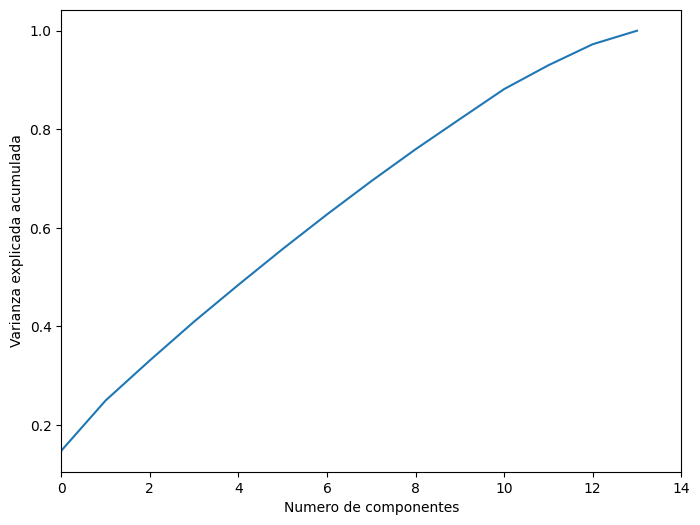

In [32]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

**Comentario**

El gráfico anterior muestra que casi el 90% de la varianza se explica por los primeros 12 componentes.

# Conclusión

En este núcleo, he analizado el análisis de componentes principales, la técnica de reducción de dimensionalidad más popular.

He demostrado la implementación del análisis de componentes principales con regresión logística en el conjunto de datos de adultos.

Encontré la máxima precisión con las primeras 12 características y resultó ser 0,8227.

Como se esperaba, la cantidad de dimensiones necesarias para preservar el 90 % de la varianza resultó ser 12.

Por último, trazo la proporción de varianza explicada con la cantidad de dimensiones.

El gráfico confirma que aproximadamente el 90 % de la varianza se explica por los primeros 12 componentes.              

## Referencias

Las ideas y conceptos de este núcleo se han extraído del siguiente libro:


Aprendizaje automático práctico con Scikit-Learn y Tensorflow, de Aurelien Geron.

# **Licenciado Jonathan Lugo González**